**Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

**Dataset**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Wetland/T500.csv')

In [ ]:
#Check top 5 data
dataset.head()

,Sl,VZ,A,R,P,So,G
0,1,1,123.693001,0.000000,0.0,1,3
1,2,1,42.426399,0.000000,0.0,1,5
2,3,1,0.000000,0.006859,0.0,1,4
3,4,1,234.307007,0.007808,0.0,1,4
4,5,1,174.929001,0.007808,0.0,1,4


In [ ]:
#Check last 5 data
dataset.tail()

,Sl,VZ,A,R,P,So,G
248,249,5,450.0,0.012647,0.0,3,3
249,250,5,450.0,0.012587,0.0,3,3
250,251,5,450.0,0.001301,0.0,1,0
251,252,5,450.0,0.013888,0.0,3,3
252,253,5,450.0,0.000000,0.0,3,3


In [ ]:
#Check column names
dataset.columns

Index(['Sl', 'VZ', 'A', 'R', 'P', 'So', 'G'], dtype='object')

In [ ]:
#Dataset Information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sl      253 non-null    int64  
 1   VZ      253 non-null    int64  
 2   A       253 non-null    float64
 3   R       253 non-null    float64
 4   P       253 non-null    float64
 5   So      253 non-null    int64  
 6   G       253 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 14.0 KB


In [ ]:
#Dataset total (row,column)
dataset.shape

(253, 7)

In [ ]:
#Clean Null Values
dataset.dropna(inplace = True)

In [ ]:
#Check Null values
dataset.isnull().sum()

Sl    0
VZ    0
A     0
R     0
P     0
So    0
G     0
dtype: int64

In [ ]:
#Check uniques Values
dataset['VZ'].unique()

array([1, 2, 3, 4, 5])

In [ ]:
#Each Class data count
dataset['VZ'].value_counts()

2    51
3    51
4    51
5    51
1    49
Name: VZ, dtype: int64

In [ ]:
#Describe dataset
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl,253.0,127.000000,73.179004,1.0,64.000000,127.000000,190.000000,253.000000
VZ,253.0,3.015810,1.411316,1.0,2.000000,3.000000,4.000000,5.000000
A,253.0,233.964372,191.803828,0.0,30.000000,250.000000,350.000000,844.807983
R,253.0,0.009280,0.020716,0.0,0.002454,0.005656,0.008422,0.150000
P,253.0,7.275771,19.239640,0.0,0.000000,0.000000,0.000000,65.280197
So,253.0,2.276680,0.865183,1.0,1.000000,3.000000,3.000000,3.000000
G,253.0,4.332016,1.630696,0.0,3.000000,4.000000,6.000000,7.000000


In [ ]:
#Check co-relation
dataset.corr()

,Sl,VZ,A,R,P,So,G
Sl,1.000000,0.979781,0.881780,-0.019039,-0.492986,0.504484,-0.154231
VZ,0.979781,1.000000,0.915616,-0.020350,-0.527031,0.506634,-0.157473
A,0.881780,0.915616,1.000000,-0.013779,-0.417324,0.392726,-0.251446
R,-0.019039,-0.020350,-0.013779,1.000000,-0.097752,0.106630,-0.013239
P,-0.492986,-0.527031,-0.417324,-0.097752,1.000000,-0.483950,-0.130127
So,0.504484,0.506634,0.392726,0.106630,-0.483950,1.000000,0.145581
G,-0.154231,-0.157473,-0.251446,-0.013239,-0.130127,0.145581,1.000000


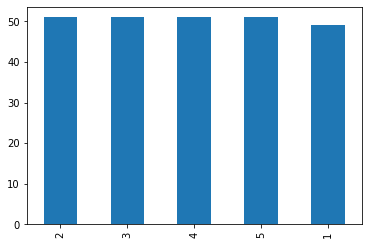

In [ ]:
#Plot classwise Target variable data counts
dataset['VZ'].value_counts().plot.bar()

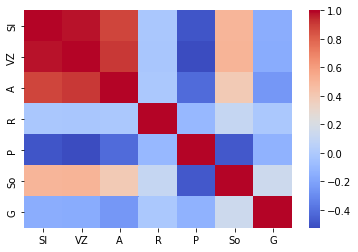

In [ ]:
#Co-relation graph heatmap
sns.heatmap(dataset.corr(),cmap='coolwarm')

**Dataset Preprocessing**

In [ ]:
X = dataset.iloc[:,2:]
Y = dataset.VZ

In [ ]:
print(X)

              A         R    P  So  G
0    123.693001  0.000000  0.0   1  3
1     42.426399  0.000000  0.0   1  5
2      0.000000  0.006859  0.0   1  4
3    234.307007  0.007808  0.0   1  4
4    174.929001  0.007808  0.0   1  4
..          ...       ...  ...  .. ..
248  450.000000  0.012647  0.0   3  3
249  450.000000  0.012587  0.0   3  3
250  450.000000  0.001301  0.0   1  0
251  450.000000  0.013888  0.0   3  3
252  450.000000  0.000000  0.0   3  3

[253 rows x 5 columns]


In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
248    5
249    5
250    5
251    5
252    5
Name: VZ, Length: 253, dtype: int64


**Label Encode**

In [ ]:
#Encode target variable data into labels (0 to ...)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(Y)
Y= label_encoder.transform(Y)
classes = label_encoder.classes_

In [ ]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


**Train-test Split**

In [ ]:
#Split dataset (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
print(X_train)

              A         R          P  So  G
162  350.000000  0.001735   0.000000   3  6
159  350.000000  0.001301   0.000000   3  3
76    60.000000  0.011550   0.000000   2  6
59     0.000000  0.011744   0.000000   3  3
176  350.000000  0.000868   0.000000   3  3
..          ...       ...        ...  .. ..
67    84.852799  0.004529   0.000000   3  6
192  350.000000  0.007687   0.000000   2  3
117  250.000000  0.007808   0.000000   3  6
47    30.000000  0.002603  55.353298   1  4
172  350.000000  0.005277   0.000000   3  6

[202 rows x 5 columns]


In [ ]:
print(X_test)

              A         R          P  So  G
158  350.000000  0.002603   0.000000   3  3
83    60.000000  0.150000   0.000000   3  3
170  350.000000  0.003158   0.000000   3  6
101  250.000000  0.000868   0.000000   3  3
150  174.929001  0.004672   0.000000   3  6
199  350.000000  0.003577   0.000000   3  3
118  250.000000  0.007808   0.000000   2  6
227  450.000000  0.013786   0.000000   3  7
63     0.000000  0.001788   0.000000   3  3
135  250.000000  0.001788   0.000000   3  7
149  250.000000  0.005059   0.000000   3  6
232  450.000000  0.012029   0.000000   3  3
109  250.000000  0.002910   0.000000   1  4
188  212.132004  0.006734   0.000000   2  3
153  240.000000  0.006940   0.000000   2  3
73    42.426399  0.004946   0.000000   3  3
205  450.000000  0.020758   0.000000   2  6
171  350.000000  0.003999   0.000000   3  6
157  350.000000  0.003388   0.000000   3  3
97    60.000000  0.001788   0.000000   3  2
187  350.000000  0.006449   0.000000   2  6
45    30.000000  0.002603  54.42

In [ ]:
print(y_train)

[3 3 1 1 3 4 0 4 0 3 1 0 1 4 4 0 2 3 4 4 4 1 0 1 1 2 4 0 2 1 2 1 1 0 4 3 4
 0 0 0 2 0 0 4 1 1 2 2 0 3 2 1 4 1 1 0 4 2 2 1 0 2 3 4 0 0 0 1 4 0 3 0 3 4
 2 4 4 1 4 3 2 3 2 0 3 2 3 2 3 1 3 1 3 4 2 0 1 1 1 1 0 1 4 2 0 4 2 1 2 2 4
 4 0 1 1 2 4 3 4 4 4 1 4 0 2 2 0 1 3 1 0 2 3 0 2 2 4 0 0 2 1 3 3 2 0 0 3 2
 3 3 0 4 2 3 4 4 0 3 2 4 2 0 3 1 1 4 3 1 3 4 2 2 4 1 1 0 3 1 4 3 4 0 4 3 1
 2 1 4 1 1 0 4 0 4 0 2 3 1 3 2 0 3]


In [ ]:
print(y_test)

[3 1 3 2 2 3 2 4 1 2 2 4 2 3 3 1 4 3 3 1 3 0 4 2 2 4 0 1 3 0 4 2 2 3 3 2 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 1]


**Min Max Scaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_norm = min_max_scaler.fit_transform(X_train)
X_test_norm = min_max_scaler.fit_transform(X_test)

In [ ]:
print(X_train_norm)

[[0.41429533 0.01156733 0.         1.         0.85714286]
 [0.41429533 0.00867533 0.         1.         0.42857143]
 [0.07102206 0.077002   0.         0.5        0.85714286]
 ...
 [0.29592523 0.052054   0.         1.         0.85714286]
 [0.03551103 0.01735133 0.84793399 0.         0.57142857]
 [0.41429533 0.03518133 0.         1.         0.85714286]]


In [ ]:
#Normalized value check
X_train_norm[0,0]  

0.414295327313783

In [ ]:
#Original Value check
X_train.iloc[0,0]

350.0

**TP,FP,TN,FN**

In [ ]:
#true positive, False positive, true negative, False negative Calculation Method
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

**Build Models**

**1. Classifier : Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(max_depth=6, random_state=1)
# Predict test set labels
dt.fit(X_train, y_train)
DT_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, DT_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.88


In [ ]:
print(y_test)

[3 1 3 2 2 3 2 4 1 2 2 4 2 3 3 1 4 3 3 1 3 0 4 2 2 4 0 1 3 0 4 2 2 3 3 2 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 1]


In [ ]:
print(DT_pred)

[3 1 3 2 2 3 2 4 1 2 2 4 2 2 2 1 4 3 3 1 3 0 4 1 2 4 0 1 3 0 4 2 0 3 3 0 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 0]


In [ ]:
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.88      0.88      0.88         8
           2       0.83      0.77      0.80        13
           3       1.00      0.87      0.93        15
           4       1.00      1.00      1.00         8

    accuracy                           0.88        51
   macro avg       0.88      0.90      0.89        51
weighted avg       0.90      0.88      0.88        51



Text(0.5, 145.31999999999996, 'Predicted')

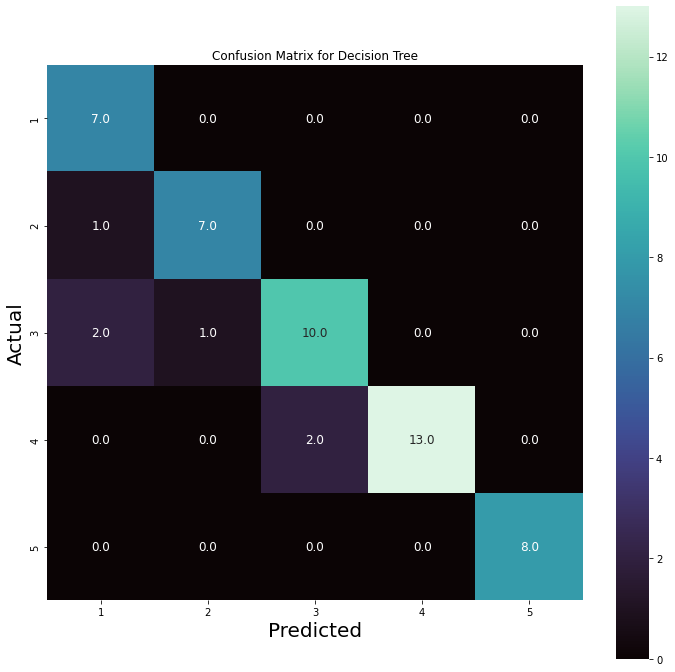

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = DT_pred
label=['1', '2','3','4','5']
Ytrue = y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Decision Tree")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_DT = confusion_matrix(y_test, DT_pred, labels=[1,2,3,4,5])
cmt_DT = confusion_matrix(y_test, DT_pred)

In [ ]:
print(cmt_DT)

[[ 7  0  0  0  0]
 [ 1  7  0  0  0]
 [ 2  1 10  0  0]
 [ 0  0  2 13  0]
 [ 0  0  0  0  8]]


In [ ]:
fp = cmt_DT.sum(axis=0) - np.diag(cm)  
fn = cmt_DT.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_DT)
tn = cmt_DT.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[3 1 2 0 0] [0 1 3 2 0] [ 7  7 10 13  8] [41 42 36 36 43]


In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

TP rate for Class 1: 7
TN rate for Class 1: 41
FP rate for Class 1: 3
FN rate for Class 1: 0


In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

TP rate for Class 2: 7
TN rate for Class 2: 42
FP rate for Class 2: 1
FN rate for Class 2: 1


In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

TP rate for Class 3: 10
TN rate for Class 3: 36
FP rate for Class 3: 2
FN rate for Class 3: 3


In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

TP rate for Class 4: 13
TN rate for Class 4: 36
FP rate for Class 4: 0
FN rate for Class 4: 2


In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

TP rate for Class 5: 8
TN rate for Class 5: 43
FP rate for Class 5: 0
FN rate for Class 5: 0


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.8823529411764706


**2. Classifier : Naive bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
NB_pred = clf_NB.predict(X_test)

In [ ]:
print(y_test)

[3 1 3 2 2 3 2 4 1 2 2 4 2 3 3 1 4 3 3 1 3 0 4 2 2 4 0 1 3 0 4 2 2 3 3 2 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 1]


In [ ]:
print(NB_pred)

[3 1 3 2 2 3 2 4 1 2 2 4 2 2 2 4 4 3 3 4 3 0 4 2 2 4 0 4 3 0 4 2 2 3 3 2 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 1]


In [ ]:
NB_acc = accuracy_score(y_test, NB_pred)
print(NB_acc)

0.9019607843137255


In [ ]:
print(classification_report(y_test, NB_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.62      0.77         8
           2       0.87      1.00      0.93        13
           3       1.00      0.87      0.93        15
           4       0.73      1.00      0.84         8

    accuracy                           0.90        51
   macro avg       0.92      0.90      0.89        51
weighted avg       0.92      0.90      0.90        51



Text(0.5, 145.31999999999996, 'Predicted')

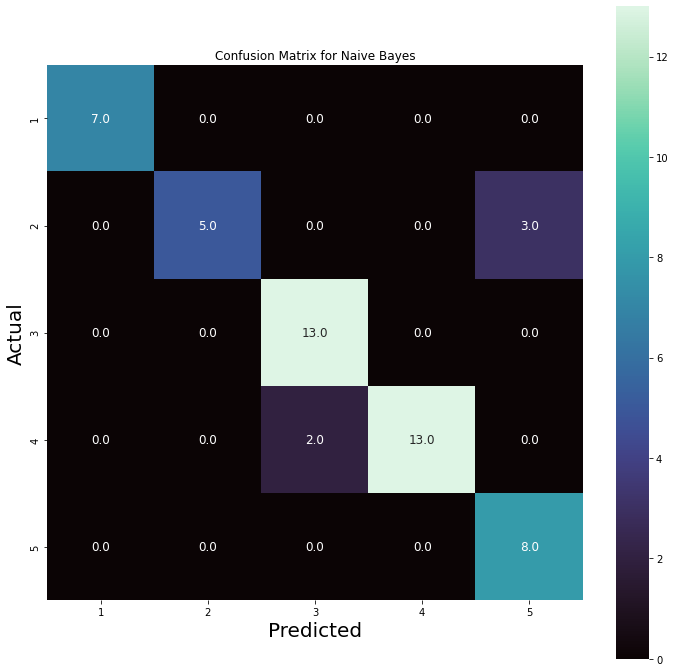

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = NB_pred
label=['1', '2','3','4','5']
Ytrue = y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Naive Bayes")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_NB = confusion_matrix(y_test, NB_pred, labels=[1,2,3,4,5])
cmt_NB = confusion_matrix(y_test, NB_pred)

In [ ]:
print(cmt_NB)

[[ 7  0  0  0  0]
 [ 0  5  0  0  3]
 [ 0  0 13  0  0]
 [ 0  0  2 13  0]
 [ 0  0  0  0  8]]


In [ ]:
fp = cmt_NB.sum(axis=0) - np.diag(cm)  
fn = cmt_NB.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_NB)
tn = cmt_NB.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[0 0 2 0 3] [0 3 0 2 0] [ 7  5 13 13  8] [44 43 36 36 40]


In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

TP rate for Class 1: 7
TN rate for Class 1: 44
FP rate for Class 1: 0
FN rate for Class 1: 0


In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

TP rate for Class 2: 5
TN rate for Class 2: 43
FP rate for Class 2: 0
FN rate for Class 2: 3


In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

TP rate for Class 3: 13
TN rate for Class 3: 36
FP rate for Class 3: 2
FN rate for Class 3: 0


In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

TP rate for Class 4: 13
TN rate for Class 4: 36
FP rate for Class 4: 0
FN rate for Class 4: 2


In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

TP rate for Class 5: 8
TN rate for Class 5: 40
FP rate for Class 5: 3
FN rate for Class 5: 0


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.9019607843137255


**3. Classifier : KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
KNN_pred = classifier.predict(X_test)

In [ ]:
print(y_test)

[3 1 3 2 2 3 2 4 1 2 2 4 2 3 3 1 4 3 3 1 3 0 4 2 2 4 0 1 3 0 4 2 2 3 3 2 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 1]


In [ ]:
print(KNN_pred)

[3 1 3 2 2 3 2 4 1 2 2 4 2 0 2 1 4 3 3 1 3 0 4 1 2 4 0 1 3 0 4 2 2 3 3 2 3
 1 0 3 2 0 4 3 1 2 4 0 1 3 0]


In [ ]:
KNN_acc = accuracy_score(y_test, KNN_pred)
print(KNN_acc)

0.9019607843137255


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, KNN_pred))

[[ 6  1  0  0  0]
 [ 1  7  0  0  0]
 [ 0  1 12  0  0]
 [ 1  0  1 13  0]
 [ 0  0  0  0  8]]


In [ ]:
print(classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.78      0.88      0.82         8
           2       0.92      0.92      0.92        13
           3       1.00      0.87      0.93        15
           4       1.00      1.00      1.00         8

    accuracy                           0.90        51
   macro avg       0.89      0.90      0.90        51
weighted avg       0.91      0.90      0.90        51



Text(0.5, 145.31999999999996, 'Predicted')

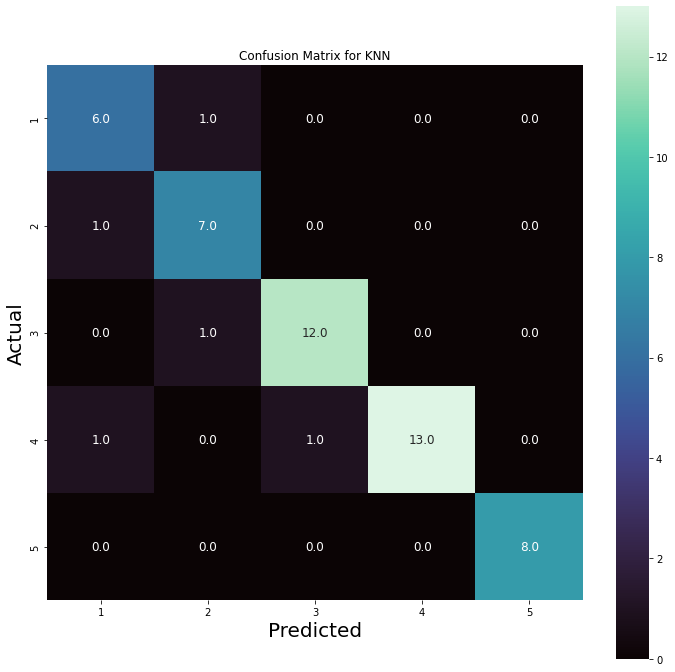

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = KNN_pred
label=['1', '2','3','4','5']
Ytrue = y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for KNN")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_KNN = confusion_matrix(y_test, KNN_pred, labels=[1,2,3,4,5])
cmt_KNN = confusion_matrix(y_test, KNN_pred)

In [ ]:
print(cmt_KNN)

[[ 6  1  0  0  0]
 [ 1  7  0  0  0]
 [ 0  1 12  0  0]
 [ 1  0  1 13  0]
 [ 0  0  0  0  8]]


In [ ]:
fp = cmt_KNN.sum(axis=0) - np.diag(cm)  
fn = cmt_KNN.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_KNN)
tn = cmt_KNN.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[2 2 1 0 0] [1 1 1 2 0] [ 6  7 12 13  8] [42 41 37 36 43]


In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

TP rate for Class 1: 6
TN rate for Class 1: 42
FP rate for Class 1: 2
FN rate for Class 1: 1


In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

TP rate for Class 2: 7
TN rate for Class 2: 41
FP rate for Class 2: 2
FN rate for Class 2: 1


In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

TP rate for Class 3: 12
TN rate for Class 3: 37
FP rate for Class 3: 1
FN rate for Class 3: 1


In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

TP rate for Class 4: 13
TN rate for Class 4: 36
FP rate for Class 4: 0
FN rate for Class 4: 2


In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

TP rate for Class 5: 8
TN rate for Class 5: 43
FP rate for Class 5: 0
FN rate for Class 5: 0


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.9019607843137255


**4. Classifier : Artificial Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
nnc = MLPClassifier(hidden_layer_sizes=(9),activation="relu",max_iter=1000)
nnc.fit(X_train, y_train)
nnc_pred =nnc.predict(X_test)
nnc_acc=accuracy_score(y_test, nnc_pred)
print(nnc_acc)

0.35294117647058826


In [ ]:
print(y_test)

[3 1 3 2 2 3 2 4 1 2 2 4 2 3 3 1 4 3 3 1 3 0 4 2 2 4 0 1 3 0 4 2 2 3 3 2 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 1]


In [ ]:
print(nnc_pred)

[4 2 3 4 3 4 3 3 0 3 3 4 3 3 3 2 3 3 4 2 3 0 3 1 3 4 1 0 4 1 4 4 3 4 3 3 3
 1 0 3 3 1 4 3 1 3 3 0 0 3 3]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, nnc_pred))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.17      0.12      0.14         8
           2       0.00      0.00      0.00        13
           3       0.40      0.67      0.50        15
           4       0.36      0.50      0.42         8

    accuracy                           0.35        51
   macro avg       0.29      0.34      0.31        51
weighted avg       0.27      0.35      0.30        51



Text(0.5, 145.31999999999996, 'Predicted')

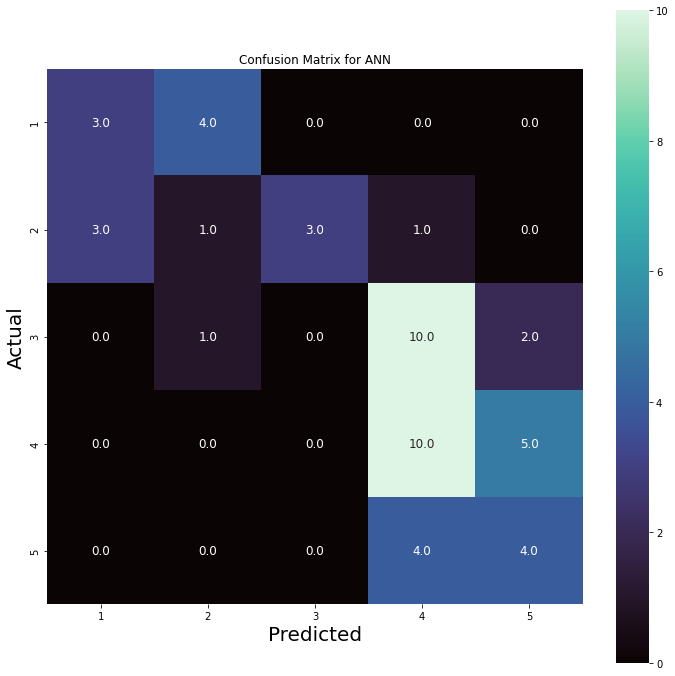

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = nnc_pred
label=['1', '2','3','4','5']
Ytrue = y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for ANN")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_ANN = confusion_matrix(y_test, nnc_pred, labels=[1,2,3,4,5])
cmt_ANN = confusion_matrix(y_test, nnc_pred)

In [ ]:
print(cmt_ANN)

[[ 3  4  0  0  0]
 [ 3  1  3  1  0]
 [ 0  1  0 10  2]
 [ 0  0  0 10  5]
 [ 0  0  0  4  4]]


In [ ]:
fp = cmt_ANN.sum(axis=0) - np.diag(cm)  
fn = cmt_ANN.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_ANN)
tn = cmt_ANN.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[ 3  5  3 15  7] [ 4  7 13  5  4] [ 3  1  0 10  4] [41 38 35 21 36]


In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

TP rate for Class 1: 3
TN rate for Class 1: 41
FP rate for Class 1: 3
FN rate for Class 1: 4


In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

TP rate for Class 2: 1
TN rate for Class 2: 38
FP rate for Class 2: 5
FN rate for Class 2: 7


In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

TP rate for Class 3: 0
TN rate for Class 3: 35
FP rate for Class 3: 3
FN rate for Class 3: 13


In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

TP rate for Class 4: 10
TN rate for Class 4: 21
FP rate for Class 4: 15
FN rate for Class 4: 5


In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

TP rate for Class 5: 4
TN rate for Class 5: 36
FP rate for Class 5: 7
FN rate for Class 5: 4


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.35294117647058826


**5. Classifier : Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
randomf = RandomForestClassifier(n_estimators=100)
randomf.fit(X_train, y_train)
rf_pred = randomf.predict(X_test)
rf_acc=accuracy_score(y_test, rf_pred)
print(rf_acc)

0.9411764705882353


In [ ]:
print(y_test)

[3 1 3 2 2 3 2 4 1 2 2 4 2 3 3 1 4 3 3 1 3 0 4 2 2 4 0 1 3 0 4 2 2 3 3 2 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 1]


In [ ]:
print(rf_pred)

[3 1 3 2 2 3 2 4 1 2 2 4 2 2 2 1 4 3 3 1 3 0 4 1 2 4 0 1 3 0 4 2 2 3 3 2 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 1]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94         8
           2       0.86      0.92      0.89        13
           3       1.00      0.87      0.93        15
           4       1.00      1.00      1.00         8

    accuracy                           0.94        51
   macro avg       0.95      0.96      0.95        51
weighted avg       0.95      0.94      0.94        51



Text(0.5, 145.31999999999996, 'Predicted')

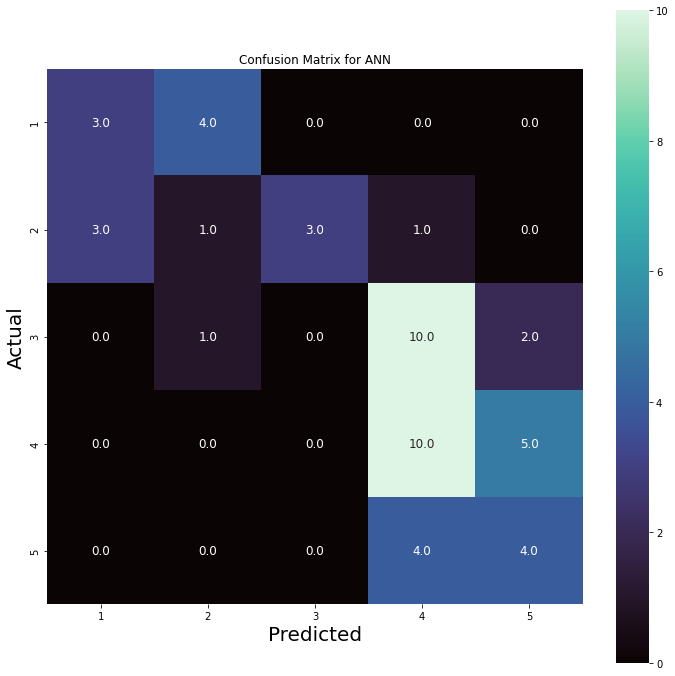

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = nnc_pred
label=['1', '2','3','4','5']
Ytrue = y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for ANN")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_RF = confusion_matrix(y_test, rf_pred, labels=[1,2,3,4,5])
cmt_RF = confusion_matrix(y_test, rf_pred)

In [ ]:
print(cmt_RF)

[[ 7  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  1 12  0  0]
 [ 0  0  2 13  0]
 [ 0  0  0  0  8]]


In [ ]:
fp = cmt_RF.sum(axis=0) - np.diag(cm)  
fn = cmt_RF.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_RF)
tn = cmt_RF.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[ 4  8 14  3  4] [ 4  7 13  5  4] [ 7  8 12 13  8] [36 28 12 30 35]


In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

TP rate for Class 1: 7
TN rate for Class 1: 36
FP rate for Class 1: 4
FN rate for Class 1: 4


In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

TP rate for Class 2: 8
TN rate for Class 2: 28
FP rate for Class 2: 8
FN rate for Class 2: 7


In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

TP rate for Class 3: 12
TN rate for Class 3: 12
FP rate for Class 3: 14
FN rate for Class 3: 13


In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

TP rate for Class 4: 13
TN rate for Class 4: 30
FP rate for Class 4: 3
FN rate for Class 4: 5


In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

TP rate for Class 5: 8
TN rate for Class 5: 35
FP rate for Class 5: 4
FN rate for Class 5: 4


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.35294117647058826


**6. Classifier : Gradiant Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import joblib
from  sklearn.utils import parallel_backend 
gboost = GradientBoostingClassifier(learning_rate=.1, n_estimators=500,max_depth=5 )

In [ ]:
gboost.fit(X_train, y_train)
gboost_pred = gboost.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
gboost_acc=accuracy_score(y_test, gboost_pred)
print(gboost_acc)

0.9019607843137255


In [ ]:
print(y_test)

[3 1 3 2 2 3 2 4 1 2 2 4 2 3 3 1 4 3 3 1 3 0 4 2 2 4 0 1 3 0 4 2 2 3 3 2 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 1]


In [ ]:
print(gboost_pred)

[3 1 3 2 2 3 2 4 1 2 2 4 2 2 2 1 4 3 3 1 3 0 4 1 2 4 0 1 3 0 4 2 0 3 3 2 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 0]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gboost_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.88      0.88      0.88         8
           2       0.85      0.85      0.85        13
           3       1.00      0.87      0.93        15
           4       1.00      1.00      1.00         8

    accuracy                           0.90        51
   macro avg       0.90      0.92      0.90        51
weighted avg       0.91      0.90      0.90        51



Text(0.5, 145.31999999999996, 'Predicted')

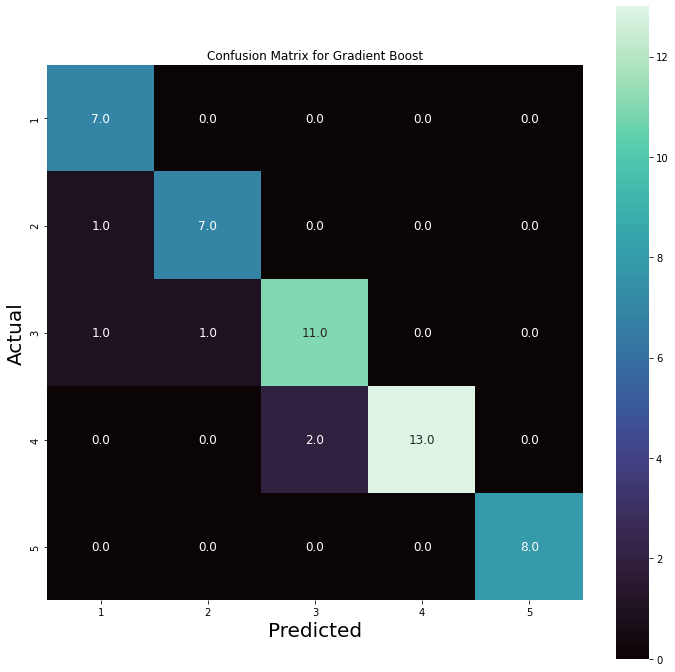

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = gboost_pred
label=['1', '2','3','4','5']
Ytrue = y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Gradient Boost")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_gboost = confusion_matrix(y_test, gboost_pred, labels=[1,2,3,4,5])
cmt_gboost = confusion_matrix(y_test, gboost_pred)

In [ ]:
print(cmt_gboost)

[[ 7  0  0  0  0]
 [ 1  7  0  0  0]
 [ 1  1 11  0  0]
 [ 0  0  2 13  0]
 [ 0  0  0  0  8]]


In [ ]:
fp = cmt_gboost.sum(axis=0) - np.diag(cm)  
fn = cmt_gboost.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_gboost)
tn = cmt_gboost.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[2 1 2 0 0] [0 1 2 2 0] [ 7  7 11 13  8] [42 42 36 36 43]


In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

TP rate for Class 1: 7
TN rate for Class 1: 42
FP rate for Class 1: 2
FN rate for Class 1: 0


In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

TP rate for Class 2: 7
TN rate for Class 2: 42
FP rate for Class 2: 1
FN rate for Class 2: 1


In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

TP rate for Class 3: 11
TN rate for Class 3: 36
FP rate for Class 3: 2
FN rate for Class 3: 2


In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

TP rate for Class 4: 13
TN rate for Class 4: 36
FP rate for Class 4: 0
FN rate for Class 4: 2


In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

TP rate for Class 5: 8
TN rate for Class 5: 43
FP rate for Class 5: 0
FN rate for Class 5: 0


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.9019607843137255


**7.  Classifier : Xtreme Gradient Boost**

In [ ]:
import xgboost as xgb
xgbd = xgb.XGBClassifier(max_depth=10, n_estimators=5000 , learning_rate=.5, n_jobs=-1)

In [ ]:
xgbd.fit(X_train, y_train)
xgb_pred = xgbd.predict(X_test)
xgb_acc=accuracy_score(y_test, xgb_pred)
print(xgb_acc)

0.9411764705882353


In [ ]:
print(y_test)

[3 1 3 2 2 3 2 4 1 2 2 4 2 3 3 1 4 3 3 1 3 0 4 2 2 4 0 1 3 0 4 2 2 3 3 2 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 1]


In [ ]:
print(xgb_pred)

[3 1 3 2 2 3 2 4 1 2 2 4 2 2 0 1 4 3 3 1 3 0 4 1 2 4 0 1 3 0 4 2 2 3 3 2 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 1]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.89      1.00      0.94         8
           2       0.92      0.92      0.92        13
           3       1.00      0.87      0.93        15
           4       1.00      1.00      1.00         8

    accuracy                           0.94        51
   macro avg       0.94      0.96      0.95        51
weighted avg       0.95      0.94      0.94        51



Text(0.5, 145.31999999999996, 'Predicted')

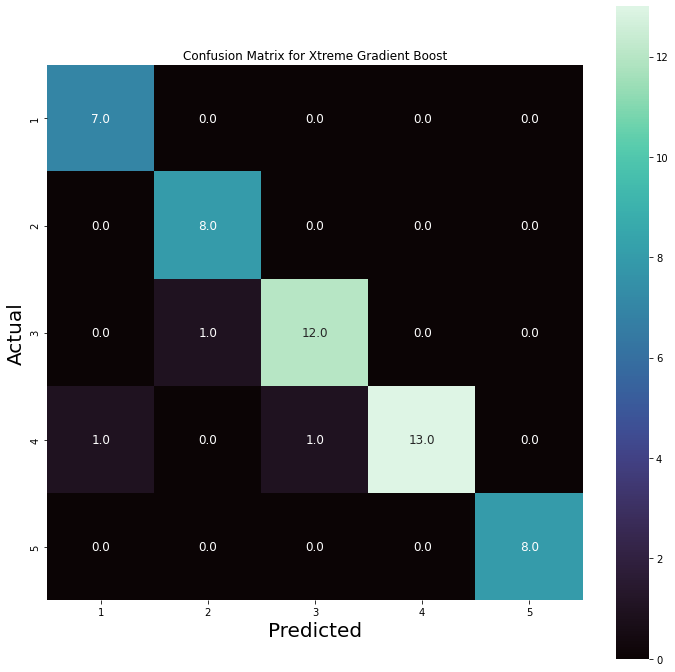

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = xgb_pred
label=['1', '2','3','4','5']
Ytrue = y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Xtreme Gradient Boost")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_xgb = confusion_matrix(y_test, xgb_pred, labels=[1,2,3,4,5])
cmt_xgb = confusion_matrix(y_test, xgb_pred)

In [ ]:
print(cmt_xgb)

[[ 7  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  1 12  0  0]
 [ 1  0  1 13  0]
 [ 0  0  0  0  8]]


In [ ]:
fp = cmt_xgb.sum(axis=0) - np.diag(cm)  
fn = cmt_xgb.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_xgb)
tn = cmt_xgb.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[1 1 1 0 0] [0 0 1 2 0] [ 7  8 12 13  8] [43 42 37 36 43]


In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

TP rate for Class 1: 7
TN rate for Class 1: 43
FP rate for Class 1: 1
FN rate for Class 1: 0


In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

TP rate for Class 2: 8
TN rate for Class 2: 42
FP rate for Class 2: 1
FN rate for Class 2: 0


In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

TP rate for Class 3: 12
TN rate for Class 3: 37
FP rate for Class 3: 1
FN rate for Class 3: 1


In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

TP rate for Class 4: 13
TN rate for Class 4: 36
FP rate for Class 4: 0
FN rate for Class 4: 2


In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

TP rate for Class 5: 8
TN rate for Class 5: 43
FP rate for Class 5: 0
FN rate for Class 5: 0


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.9411764705882353


**8. Classifer: Stacking Random Forest**

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc = MLPClassifier(hidden_layer_sizes=(9),activation="relu",max_iter=1000)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
randomf = RandomForestClassifier(n_jobs=-1)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
from sklearn.model_selection import GridSearchCV
estimators = [('rf', randomf),('neural', nnc),
        ('knn',knn)
        ]
from sklearn.ensemble import StackingClassifier
final_estimator = {'final_estimator':[randomf,knn,nnc,None]}
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
newgsearchrandom =  StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=randomf)
newgsearchrandom.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
newgsearchrandom_pred = newgsearchrandom.predict(X_test)
newgsearchrandom_acc=accuracy_score(y_test, newgsearchrandom_pred)
print(newgsearchrandom_acc)

0.9215686274509803


In [ ]:
print(y_test)

[3 1 3 2 2 3 2 4 1 2 2 4 2 3 3 1 4 3 3 1 3 0 4 2 2 4 0 1 3 0 4 2 2 3 3 2 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 1]


In [ ]:
print(newgsearchrandom_pred)

[3 1 3 2 2 3 2 4 1 2 2 4 2 2 2 1 4 3 3 1 3 0 4 1 2 4 0 1 3 0 4 2 0 3 3 2 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 1]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, newgsearchrandom_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.89      1.00      0.94         8
           2       0.85      0.85      0.85        13
           3       1.00      0.87      0.93        15
           4       1.00      1.00      1.00         8

    accuracy                           0.92        51
   macro avg       0.92      0.94      0.93        51
weighted avg       0.93      0.92      0.92        51



Text(0.5, 145.31999999999996, 'Predicted')

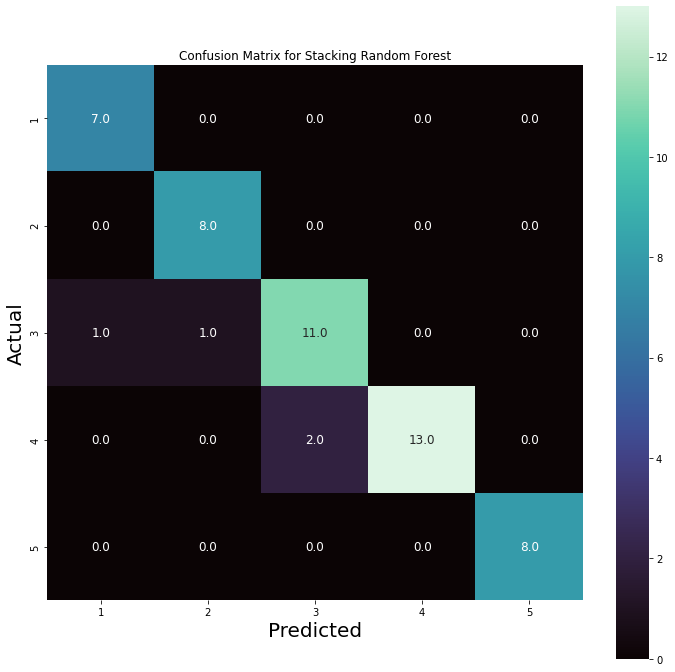

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = newgsearchrandom_pred
label=['1', '2','3','4','5']
Ytrue = y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Stacking Random Forest")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_SRF = confusion_matrix(y_test, newgsearchrandom_pred, labels=[1,2,3,4,5])
cmt_SRF = confusion_matrix(y_test, newgsearchrandom_pred)

In [ ]:
print(cmt_SRF)

[[ 7  0  0  0  0]
 [ 0  8  0  0  0]
 [ 1  1 11  0  0]
 [ 0  0  2 13  0]
 [ 0  0  0  0  8]]


In [ ]:
fp = cmt_SRF.sum(axis=0) - np.diag(cm)  
fn = cmt_SRF.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_SRF)
tn = cmt_SRF.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[1 1 2 0 0] [0 0 2 2 0] [ 7  8 11 13  8] [43 42 36 36 43]


In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

TP rate for Class 1: 7
TN rate for Class 1: 43
FP rate for Class 1: 1
FN rate for Class 1: 0


In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

TP rate for Class 2: 8
TN rate for Class 2: 42
FP rate for Class 2: 1
FN rate for Class 2: 0


In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

TP rate for Class 3: 11
TN rate for Class 3: 36
FP rate for Class 3: 2
FN rate for Class 3: 2


In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

TP rate for Class 4: 13
TN rate for Class 4: 36
FP rate for Class 4: 0
FN rate for Class 4: 2


In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

TP rate for Class 5: 8
TN rate for Class 5: 43
FP rate for Class 5: 0
FN rate for Class 5: 0


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.9215686274509803


**9. Classifier: Stacking Neural Network**

In [ ]:
newgsearchnnc =  StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=nnc)
newgsearchnnc.fit(X_train, y_train)
newgsearchnnc_pred = newgsearchnnc.predict(X_test)
newgsearchnnc_acc=accuracy_score(y_test, newgsearchnnc_pred)
print(newgsearchnnc_acc)

0.9411764705882353


In [ ]:
print(y_test)

[3 1 3 2 2 3 2 4 1 2 2 4 2 3 3 1 4 3 3 1 3 0 4 2 2 4 0 1 3 0 4 2 2 3 3 2 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 1]


In [ ]:
print(newgsearchnnc_pred)

[3 1 3 2 2 3 2 4 1 2 2 4 2 2 2 1 4 3 3 1 3 0 4 1 2 4 0 1 3 0 4 2 2 3 3 2 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 1]


In [ ]:
print(classification_report(y_test, newgsearchnnc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94         8
           2       0.86      0.92      0.89        13
           3       1.00      0.87      0.93        15
           4       1.00      1.00      1.00         8

    accuracy                           0.94        51
   macro avg       0.95      0.96      0.95        51
weighted avg       0.95      0.94      0.94        51



Text(0.5, 145.31999999999996, 'Predicted')

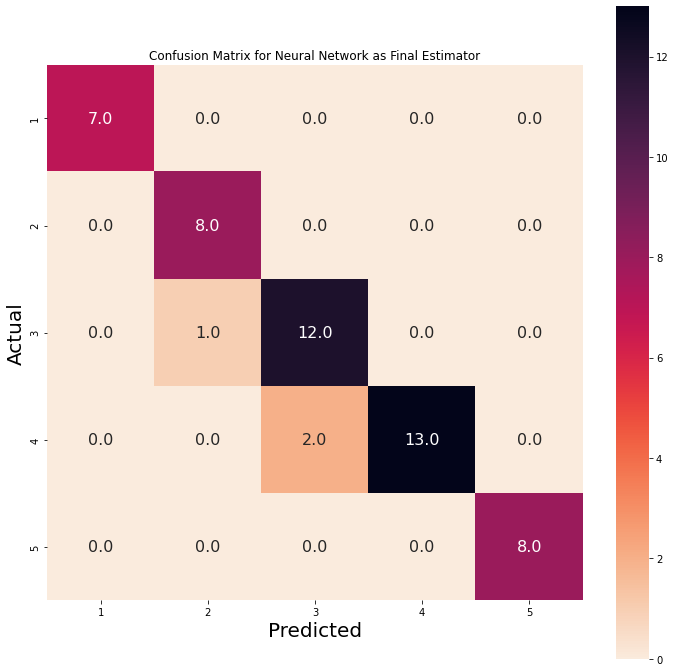

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = newgsearchnnc_pred
label=['1', '2','3','4', '5']
Ytrue = y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Neural Network as Final Estimator")
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_SANN = confusion_matrix(y_test, newgsearchnnc_pred, labels=[1,2,3,4,5])
cmt_SANN = confusion_matrix(y_test, newgsearchnnc_pred)

In [ ]:
print(cmt_SANN)

[[ 7  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  1 12  0  0]
 [ 0  0  2 13  0]
 [ 0  0  0  0  8]]


In [ ]:
fp = cmt_SANN.sum(axis=0) - np.diag(cm)  
fn = cmt_SANN.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_SANN)
tn = cmt_SANN.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[0 1 2 0 0] [0 0 1 2 0] [ 7  8 12 13  8] [44 42 36 36 43]


In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

TP rate for Class 1: 7
TN rate for Class 1: 44
FP rate for Class 1: 0
FN rate for Class 1: 0


In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

TP rate for Class 2: 8
TN rate for Class 2: 42
FP rate for Class 2: 1
FN rate for Class 2: 0


In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

TP rate for Class 3: 12
TN rate for Class 3: 36
FP rate for Class 3: 2
FN rate for Class 3: 1


In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

TP rate for Class 4: 13
TN rate for Class 4: 36
FP rate for Class 4: 0
FN rate for Class 4: 2


In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

TP rate for Class 5: 8
TN rate for Class 5: 43
FP rate for Class 5: 0
FN rate for Class 5: 0


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.9411764705882353


**10. Classifier : Support Vector Machine**

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svc = LinearSVC(C=10, class_weight='balanced')
svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=10, class_weight='balanced')

In [ ]:
SVM_pred = svc.predict(X_test)

In [ ]:
print(y_test)

[3 1 3 2 2 3 2 4 1 2 2 4 2 3 3 1 4 3 3 1 3 0 4 2 2 4 0 1 3 0 4 2 2 3 3 2 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 1]


In [ ]:
print(SVM_pred)

[4 1 2 4 1 4 2 2 1 1 1 4 3 4 4 1 4 2 4 1 3 0 4 1 3 4 0 1 4 0 4 4 3 4 1 3 3
 0 0 4 3 0 4 2 1 1 4 0 1 2 1]


In [ ]:
SVM_acc = accuracy_score(y_test, SVM_pred)
print(SVM_acc)

0.49019607843137253


In [ ]:
print(classification_report(y_test, SVM_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.57      1.00      0.73         8
           2       0.17      0.08      0.11        13
           3       0.29      0.13      0.18        15
           4       0.41      0.88      0.56         8

    accuracy                           0.49        51
   macro avg       0.49      0.62      0.51        51
weighted avg       0.42      0.49      0.42        51



Text(0.5, 145.31999999999996, 'Predicted')

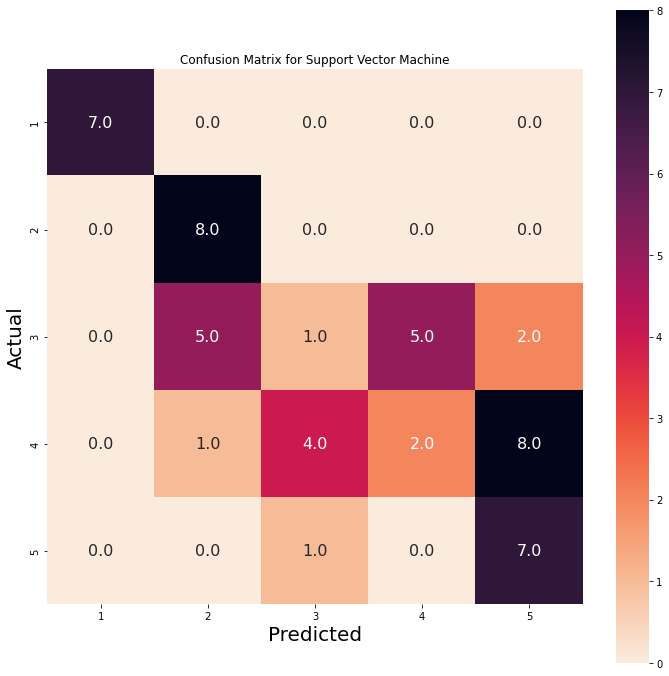

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = SVM_pred
label=['1', '2','3','4', '5']
Ytrue = y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Support Vector Machine")
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_SVM_new = confusion_matrix(y_test, SVM_pred, labels=[1,2,3,4,5])
cmt_SVM_new = confusion_matrix(y_test, SVM_pred)

In [ ]:
print(cmt_SVM_new)

[[7 0 0 0 0]
 [0 8 0 0 0]
 [0 5 1 5 2]
 [0 1 4 2 8]
 [0 0 1 0 7]]


In [ ]:
fp = cmt_SVM_new.sum(axis=0) - np.diag(cm)  
fn = cmt_SVM_new.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_SVM_new)
tn = cmt_SVM_new.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[ 0  6  5  5 10] [ 0  0 12 13  1] [7 8 1 2 7] [44 37 33 31 33]


In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

TP rate for Class 1: 7
TN rate for Class 1: 44
FP rate for Class 1: 0
FN rate for Class 1: 0


In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

TP rate for Class 2: 8
TN rate for Class 2: 37
FP rate for Class 2: 6
FN rate for Class 2: 0


In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

TP rate for Class 3: 1
TN rate for Class 3: 33
FP rate for Class 3: 5
FN rate for Class 3: 12


In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

TP rate for Class 4: 2
TN rate for Class 4: 31
FP rate for Class 4: 5
FN rate for Class 4: 13


In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

TP rate for Class 5: 7
TN rate for Class 5: 33
FP rate for Class 5: 10
FN rate for Class 5: 1


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.49019607843137253


**10.1 Classifier: Support Vector Machine - RBF kernel**

In [ ]:
from sklearn.svm import SVC
svc_new = SVC(kernel ='rbf', class_weight='balanced')
svc_new.fit(X_train, y_train)

SVC(class_weight='balanced')

In [ ]:
SVM_newpred = svc_new.predict(X_test)

In [ ]:
print(y_test)

[3 1 3 2 2 3 2 4 1 2 2 4 2 3 3 1 4 3 3 1 3 0 4 2 2 4 0 1 3 0 4 2 2 3 3 2 3
 0 0 3 2 0 4 3 1 2 4 0 1 3 1]


In [ ]:
print(SVM_newpred)

[3 1 3 2 2 3 2 4 1 2 2 4 2 2 2 1 4 3 3 1 3 0 4 1 2 4 1 1 3 1 4 2 2 3 3 2 3
 1 0 3 2 1 4 3 1 2 4 0 1 3 0]


In [ ]:
SVMnew_acc = accuracy_score(y_test, SVM_newpred)
print(SVMnew_acc)

0.8431372549019608


In [ ]:
print(classification_report(y_test, SVM_newpred))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.58      0.88      0.70         8
           2       0.86      0.92      0.89        13
           3       1.00      0.87      0.93        15
           4       1.00      1.00      1.00         8

    accuracy                           0.84        51
   macro avg       0.84      0.82      0.81        51
weighted avg       0.86      0.84      0.84        51



Text(0.5, 145.31999999999996, 'Predicted')

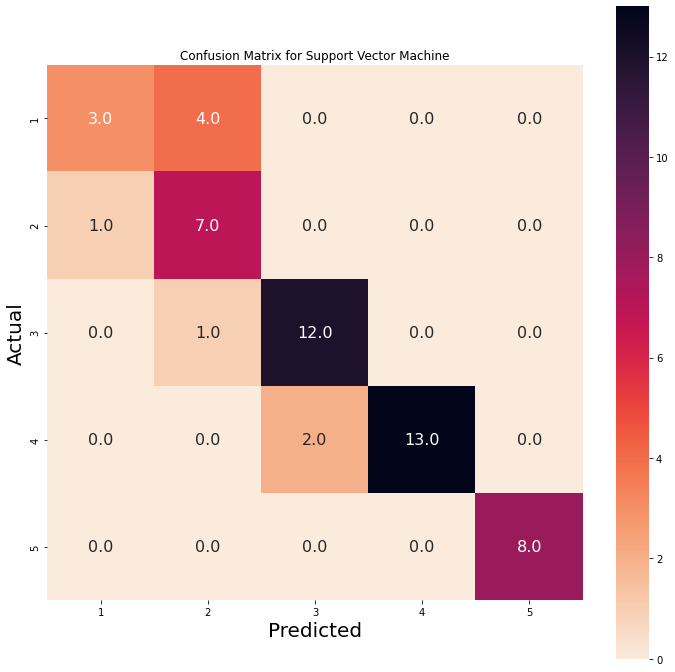

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = SVM_newpred
label=['1', '2','3','4', '5']
Ytrue = y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Support Vector Machine")
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_SVM = confusion_matrix(y_test, SVM_newpred, labels=[1,2,3,4,5])
cmt_SVM = confusion_matrix(y_test, SVM_newpred)

In [ ]:
print(cmt_SVM)

[[ 3  4  0  0  0]
 [ 1  7  0  0  0]
 [ 0  1 12  0  0]
 [ 0  0  2 13  0]
 [ 0  0  0  0  8]]


In [ ]:
fp = cmt_SVM.sum(axis=0) - np.diag(cm)  
fn = cmt_SVM.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_SVM)
tn = cmt_SVM.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[1 5 2 0 0] [4 1 1 2 0] [ 3  7 12 13  8] [43 38 36 36 43]


In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

TP rate for Class 1: 3
TN rate for Class 1: 43
FP rate for Class 1: 1
FN rate for Class 1: 4


In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

TP rate for Class 2: 7
TN rate for Class 2: 38
FP rate for Class 2: 5
FN rate for Class 2: 1


In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

TP rate for Class 3: 12
TN rate for Class 3: 36
FP rate for Class 3: 2
FN rate for Class 3: 1


In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

TP rate for Class 4: 13
TN rate for Class 4: 36
FP rate for Class 4: 0
FN rate for Class 4: 2


In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

TP rate for Class 5: 8
TN rate for Class 5: 43
FP rate for Class 5: 0
FN rate for Class 5: 0


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.8431372549019608
